# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.




# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso. Iremos praticar tarefas básicas de aquisição, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- O arquivo ipynb exportado como html

Para entregar este projeto, vá a [sala de aula](https://coco.udacity.com/nanodegrees/nd111/locale/pt-br/versions/1.0.0/parts/339726/modules/339733/lessons/340886/project) e submeta o seu `.ipynb` e o html, zipados.

# Lembretes

Antes de começarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que você pode ver do lado esquerdo de uma célula de código quando foi executado pela última vez se houver um número dentro das chaves.
- Quando você inicia uma nova sessão do notebook, certifique-se de executar todas as células até o ponto em que você deixou a última vez. Mesmo que a saída ainda seja visível a partir de quando você executou as células em sua sessão anterior, o kernel começa em um estado novo, então você precisará recarregar os dados, etc. em uma nova sessão.
- O ponto anterior é útil para ter em mente se suas respostas não correspondem ao que é esperado nos questionários da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que você esteja trabalhando com as mesmas variáveis e dados que estão em cada fase do questionário.

## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [2]:
import os
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
from datetime import datetime as dt
import time


# Recuperar informações da Web
def getUrl(url):
    try:
        u = urllib.request.urlopen(url)
        html = u.read()
        
        return html, u     
    except Exception as e:
        raise RuntimeError("HTTP Request error %s" % str(e))    

def create_Directory(path):
    directory = os.path.abspath(path)

    if not os.path.exists(directory):
        os.makedirs(directory)

def download(links, basedir):
    try:        
        # Create directory
        create_Directory(basedir + '/')

        files = []
        total = len(links)
        count = 0        
        start = time.time()
        print('Starting downlaod {} files'.format(total))
        
        for filename, link in links.items(): 
            count+=1                                
            path = os.path.abspath(basedir + '/%s' % filename)
            files.append(path)  
            local_filename, headers = urllib.request.urlretrieve(link,path)
            print( '{} - {} downloaded'.format( count, local_filename ) )           
        
        print('{} files download has finished successfully in {}'.format( total, time.time()-start ))
            
        return files

    except Exception as e:
        raise RuntimeError("Exception Download  %s" % str(e))
    
    
def get_turnstile_links(year, month=None):
    try:
        html, u = getUrl("http://web.mta.info/developers/turnstile.html")
        soup = BeautifulSoup(html, "html.parser")
        links = soup.find("div", class_="last").find_all("a")

        datalinks = {}

        for link in links:
            try:
                date = dt.strptime(link.get_text(), "%A, %B %d, %Y")

                if (date.year == year and (not month or date.month == month)):
                    href = link.get("href")
                    filename = href.rsplit("/", 1)[-1]
                    datalinks[filename] = "http://web.mta.info/developers/" + href
            except ValueError as e:
                print("Invalid link %s: Reason %s" % (link.get("href"), str(e)))

        return datalinks
    except Exception as e:
        raise RuntimeError("Reason %s" % str(e))


# Global Variable defination
data_Directory = "data"
year = 2017
month = 7
links = get_turnstile_links(year, month)
fileNames = download(links, data_Directory)


Starting downlaod 5 files
1 - C:\node_app\course\Udacity\FDSII\Semana4\Projeto\data\turnstile_170729.txt downloaded
2 - C:\node_app\course\Udacity\FDSII\Semana4\Projeto\data\turnstile_170722.txt downloaded
3 - C:\node_app\course\Udacity\FDSII\Semana4\Projeto\data\turnstile_170715.txt downloaded
4 - C:\node_app\course\Udacity\FDSII\Semana4\Projeto\data\turnstile_170708.txt downloaded
5 - C:\node_app\course\Udacity\FDSII\Semana4\Projeto\data\turnstile_170701.txt downloaded
5 files download has finished successfully in 22.35419797897339


### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [3]:
def create_master_turnstile_file(filenames, output_file):
    create_Directory(output_file.rsplit("/", 1)[0])
    
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            with open(filename, 'r') as f:
                f.readline()
                master_file.write(f.read())
    
    return output_file

output_dir = "output"
turnstile_file = create_master_turnstile_file(fileNames, output_dir + "/turnstile_1707.txt")
print("Finished file merge...")
            

Finished file merge...


### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [4]:
import pandas

def filter_by_regular(filename):
    
    # your code here    
    df = pandas.read_csv(filename)
    df = df[df['DESCn'] == "REGULAR"]
    
    return df

df_turnstile_regular = filter_by_regular(turnstile_file)

df_turnstile_regular.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,00:00:00,REGULAR,6262933,2121633
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,04:00:00,REGULAR,6262960,2121637
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,08:00:00,REGULAR,6262980,2121670
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,12:00:00,REGULAR,6263070,2121727
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,16:00:00,REGULAR,6263313,2121772


### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly
2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [5]:
import pandas

def get_hourly_entries(df):
    #your code here
    df['ENTRIESn_hourly'] = (df['ENTRIESn'] - df['ENTRIESn'].shift(1)).fillna(1).apply(int)
    
    return df

df_Entries = get_hourly_entries(df_turnstile_regular)
df_Entries.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,00:00:00,REGULAR,6262933,2121633,1
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,04:00:00,REGULAR,6262960,2121637,27
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,08:00:00,REGULAR,6262980,2121670,20
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,12:00:00,REGULAR,6263070,2121727,90
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,16:00:00,REGULAR,6263313,2121772,243


### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [6]:
import pandas

def get_hourly_exits(df):
    
    #your code here
    df['EXITSn_hourly'] = (df['EXITSn'] - df['EXITSn'].shift(1)).fillna(0).apply(int)
    return df

df_Exits = get_hourly_exits(df_turnstile_regular)
df_Exits.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,00:00:00,REGULAR,6262933,2121633,1,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,04:00:00,REGULAR,6262960,2121637,27,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,08:00:00,REGULAR,6262980,2121670,20,33
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,12:00:00,REGULAR,6263070,2121727,90,57
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,16:00:00,REGULAR,6263313,2121772,243,45


### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [7]:
def time_to_hour(time):
    hour = int(time[:2])
    return hour

def hour_to_int(df):
    df['TIMEn'] = df['TIMEn'].apply(time_to_hour)
    return df

df_Exits.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,00:00:00,REGULAR,6262933,2121633,1,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,04:00:00,REGULAR,6262960,2121637,27,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,08:00:00,REGULAR,6262980,2121670,20,33
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,12:00:00,REGULAR,6263070,2121727,90,57
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/22/2017,16:00:00,REGULAR,6263313,2121772,243,45


## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [9]:
import pandas as pd

#your code here
filename = data_Directory + "/turnstile_data_master_with_weather.csv"

df_weather_data = pandas.read_csv(filename, sep=",")
df_weather_data.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

In [10]:
# install pandasql if is not installed
import imp
try:
    imp.find_module('pandasql')
except ImportError:
    !pip install pandasql

import pandasql as pdsql

def num_rainy_days(weather_data):
    q = """
    SELECT COUNT(DISTINCT DATEn) n
    FROM weather_data
    WHERE cast(rain as integer) = 1
    """
    rainy_days = pdsql.sqldf(q.lower(), locals())
    return rainy_days["n"].get(0)

num_rainy_days(df_weather_data)

10

In [11]:
# Another way
def num_rainy_days(weather_data):
    return len(weather_data[weather_data.rain == 1].groupby('DATEn'))

num_rainy_days(df_weather_data)

10

### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).

In [12]:
def max_temp_aggregate_by_fog(weather_data):
    q = """
    SELECT fog, MAX(maxtempi) maxtempi
    FROM weather_data
    GROUP BY fog
    """
    max_temp_by_fog_days = pdsql.sqldf(q.lower(), locals())
    return max_temp_by_fog_days

max_temp_aggregate_by_fog(df_weather_data)

,fog,maxtempi
0,0.0,86.0
1,1.0,81.0


In [13]:
#Another Way
df_max_temp = df_weather_data.groupby(["fog"])['maxtempi'].max()
df_max_temp.head()


fog
0.0    86.0
1.0    81.0
Name: maxtempi, dtype: float64

### *Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [14]:
def avg_weekend_temperature(weather_data):
    q = """
    SELECT AVG(meantempi) meantempi
    FROM weather_data
    WHERE cast (strftime('%w', DATEn) as integer) in (0, 6)
    """
    mean_temp_weekends = pdsql.sqldf(q.lower(), locals())
    return mean_temp_weekends["meantempi"].get(0)

avg_weekend_temperature(df_weather_data)

65.100666854033065

In [16]:
# Another way
df_weather_data['DATAn']   = pd.to_datetime( df_weather_data['DATEn'])
df_weather_data['Dia']     = pd.to_datetime( df_weather_data['DATEn']).dt.day
df_weather_data['Weekday'] = pd.to_datetime( df_weather_data['DATEn']).dt.dayofweek

df_weather_data[df_weather_data['Weekday'].isin([0, 6])]['meantempi'].mean()

63.44192911150973

### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [17]:
def avg_min_temperature(weather_data):
    q = """
    SELECT AVG(mintempi) mintempi
    FROM weather_data
    WHERE mintempi > 55
    AND   rain = 1
    """
    avg_min_temp_rainy = pdsql.sqldf(q.lower(), locals())
    return avg_min_temp_rainy["mintempi"].get(0)

avg_weekend_temperature(df_weather_data)

65.100666854033065

In [18]:
# Another way
df_weather_data[(df_weather_data['mintempi'] > 55) & (df_weather_data['rain'] == 1)]['mintempi'].mean()

61.238860398860396

### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

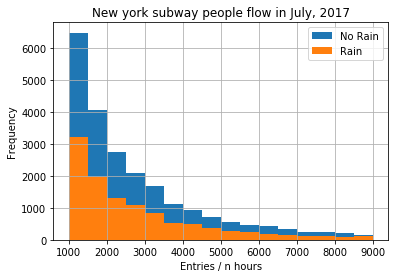

In [19]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date


def entries_histogram(t):
    plt.figure()
    t["ENTRIESn_hourly"][t.rain == 0].hist(bins = 16, range=(1000, 9000))
    t["ENTRIESn_hourly"][t.rain == 1].hist(bins = 16, range=(1000, 9000))

    plt.xlabel("Entries / n hours")
    plt.ylabel("Frequency")
    plt.legend(("No Rain", "Rain"))
    
    date_str = dt.strftime(date(year, month, 1), "%B, %Y")
    plt.title("New york subway people flow in %s" % date_str)
        
    return plt

hist = entries_histogram(df_weather_data)
hist.show()


### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: 
Há uma distribuição oblíqua, com uma assimetria positiva, onde a moda, mediana e média tem a mesma assimetria quando chove ou não chove.

### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [20]:
import numpy as np
import pandas

def means(turnstile_weather):
    
    entries_hour = turnstile_weather['ENTRIESn_hourly']
    with_rain = entries_hour[turnstile_weather.rain == 1]
    without_rain = entries_hour[turnstile_weather.rain == 0]

    with_rain_mean = np.mean(with_rain)
    without_rain_mean = np.mean(without_rain)
    
    return with_rain_mean, without_rain_mean # leave this line for the grader

means(df_weather_data)

(1105.4463767458733, 1090.278780151855)

In [21]:
# Another way
# Como utilizar uma função para fazer um DECODE do retorno do GroupBy (Help me!)
# A instrução abaixo falha quando chamo a função!
def get_weather(n):
    if n == 1:
        return "Rain"
    else:
        return "Not Rain"
    

# It's work another way    
# df_weather_data.groupby(get_weather(['rain']))['ENTRIESn_hourly'].mean() # KeyError: 'Not Rain' Does not working!!!!
    
# It's work another way    
df_weather_data.groupby(['rain'])['ENTRIESn_hourly'].mean()

# It's work another way
df_weather_data.groupby(['rain'], as_index=False).agg({"ENTRIESn_hourly": "mean"})

,rain,ENTRIESn_hourly
0,0.0,1090.278780
1,1.0,1105.446377


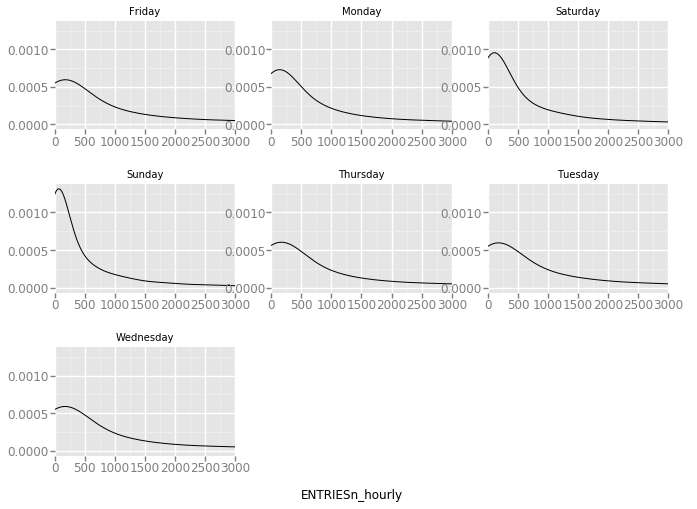

<ggplot: (143798093653)>


In [23]:
from datetime import datetime

try:
    imp.find_module('ggplot')
except ImportError:
    !pip install ggplot
    
from ggplot import *

df = df_weather_data[['DATEn', 'ENTRIESn_hourly', 'rain','Weekday']]
df.is_copy = False

# get the weekday as a string
f = lambda x: datetime.strptime(x, "%Y-%m-%d").strftime('%A') 

df['weekday'] = df['DATEn'].apply(f)

print(ggplot(aes(x='ENTRIESn_hourly'), data = df) + \
      geom_density() + \
      xlim(0,3000) + \
      facet_wrap('weekday'))

** Resposta **: (1105.4463767458733, 1090.278780151855)

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [1]:
import sys
import csv

def mapper():
    first_line = True
    unit_idx = 0
    entries_idx = 0

    try:
        reader = csv.reader(sys.stdin, delimiter=',')
        writer = csv.writer(sys.stdout, delimiter='\t', quotechar='|', quoting=csv.QUOTE_MINIMAL)

        for line in reader:
            if first_line:
                first_line = False
                headers = line
                unit_idx = headers.index("UNIT")
                entries_idx = headers.index("ENTRIESn_hourly")
            else:
                key = line[unit_idx]
                value = line[entries_idx]
                writer.writerow([key, value])

    except Exception as e:
        raise RuntimeError("Reason %s" % str(e))
            
data_Directory = "data"    
sys.stdin = open(data_Directory + '/turnstile_data_master_with_weather.csv')

# CSV file written with Python has blank lines between each row
# https://stackoverflow.com/questions/3348460/csv-file-written-with-python-has-blank-lines-between-each-row    
sys.stdout = open(data_Directory + '/mapper_result.txt', 'w', newline='')


mapper()

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [ ]:
import sys

def reducer():
    oldKey = ""
    acc = 0

    for line in sys.stdin:
        key, value = line.strip().split("\t")
        
        if key != oldKey:
            if oldKey:
                print("{0}\t{1}".format(oldKey, acc))
            acc = float(value)            
            oldKey = key
        else:
            acc += float(value)
            
    if oldKey:
        print("{0}\t{1}".format(oldKey, acc))
        
sys.stdin = open(data_Directory'/mapper_result.txt')
sys.stdout = open(data_Directory'/reducer_result.txt', 'w')

reducer()